# Classical to Quantum Computing: A Systematic Approach

This notebook presents a systematic exploration of the transition from Classical to Quantum systems. We will examine three fundamental paradigms:

1. Classical Physical Systems
2. Probabilistic Systems
3. Quantum Systems

## Learning Objectives
- Understand the fundamental differences between classical, probabilistic, and quantum systems
- Implement mathematical models for each system type
- Analyze and visualize system behaviors
- Compare and contrast the different computational paradigms

## Required Tools and Libraries
We'll use Python's scientific computing stack for our implementations.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import math

## 1. Classical Physical Systems

In classical physics, systems are described by deterministic equations of motion. We'll implement a simple harmonic oscillator as our classical system example.

### Mathematical Background
A simple harmonic oscillator follows these equations:
- Position: $x(t) = A \cos(\omega t + \phi)$
- Velocity: $v(t) = -A\omega \sin(\omega t + \phi)$
where:
- $A$ is the amplitude
- $\omega$ is the angular frequency
- $\phi$ is the phase angle

In [17]:
class ClassicalSystem:
    """A class representing a classical harmonic oscillator system.
    
    This class implements a simple harmonic oscillator with position and velocity
    states that evolve according to classical mechanics.
    """
    
    def __init__(self, amplitude: float, frequency: float, phase: float = 0):
        """Initialize the classical system.
        
        Args:
            amplitude (float): The amplitude of oscillation
            frequency (float): The angular frequency of oscillation
            phase (float, optional): Initial phase angle. Defaults to 0.
        """
        self.A = amplitude
        self.omega = frequency
        self.phi = phase
        
    def get_state(self, t: float) -> Dict[str, float]:
        """Calculate the state of the system at time t.
        
        Args:
            t (float): Time point at which to evaluate the system
            
        Returns:
            Dict[str, float]: Dictionary containing position and velocity
        """
        x = self.A * np.cos(self.omega * t + self.phi)
        v = -self.A * self.omega * np.sin(self.omega * t + self.phi)
        return {'position': x, 'velocity': v}
    
    def get_energy(self) -> float:
        """Calculate the total energy of the system.
        
        Returns:
            float: Total energy (constant for harmonic oscillator)
        """
        # For simple harmonic oscillator, E = (1/2)mω²A²
        # Assuming mass m = 1 for simplicity
        return 0.5 * self.omega**2 * self.A**2

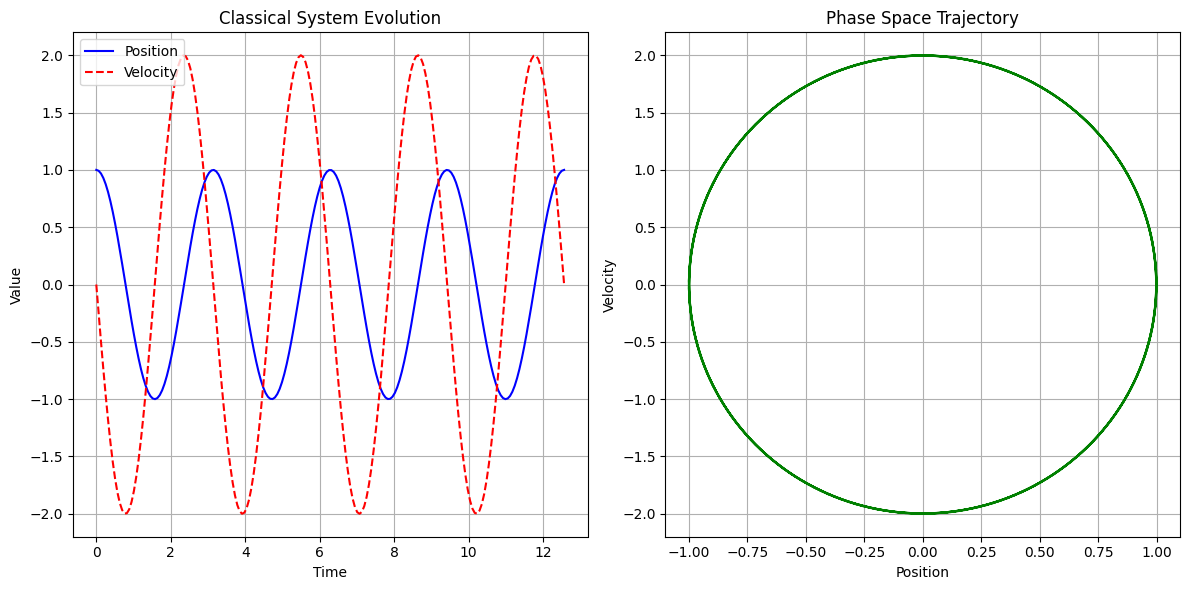

System Energy: 2.000


In [6]:
# Create and simulate a classical system
system = ClassicalSystem(amplitude=1.0, frequency=2.0)

# Generate time points
t = np.linspace(0, 4*np.pi, 200)
positions = []
velocities = []

# Calculate system evolution
for time in t:
    state = system.get_state(time)
    positions.append(state['position'])
    velocities.append(state['velocity'])

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(t, positions, 'b-', label='Position')
plt.plot(t, velocities, 'r--', label='Velocity')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Classical System Evolution')
plt.legend()
plt.grid(True)

# Phase space plot
plt.subplot(122)
plt.plot(positions, velocities, 'g-')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space Trajectory')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"System Energy: {system.get_energy():.3f}")

## 2. Probabilistic Systems

In probabilistic systems, we deal with uncertainty and probability distributions. We'll implement a two-state system with probabilistic transitions.

### Mathematical Background
The system evolution is governed by:
- Probability vector: $\vec{p}(t)$ represents the probabilities of being in each state
- Transition matrix: $T$ determines how probabilities change over time
- Evolution equation: $\vec{p}(t+1) = T\vec{p}(t)$

In [ ]:
class ProbabilisticSystem:
    """A class representing a probabilistic two-state system.
    
    This class implements a system that evolves according to probabilistic rules,
    with transitions between states governed by a transition matrix.
    """
    
    def __init__(self, initial_probabilities: np.ndarray, transition_matrix: np.ndarray):
        """Initialize the probabilistic system.
        
        Args:
            initial_probabilities (np.ndarray): Initial probability distribution (row vector)
            transition_matrix (np.ndarray): Matrix of transition probabilities (row-stochastic)
        
        Raises:
            ValueError: If probabilities don't sum to 1 or transition matrix is invalid
        """
        # Convert inputs to numpy arrays and ensure correct types
        p0 = np.asarray(initial_probabilities, dtype=float).flatten()
        T = np.asarray(transition_matrix, dtype=float)
        
        # Validate dimensions
        if p0.ndim != 1:
            raise ValueError("initial_probabilities must be 1D")
        n = p0.size
        if T.shape != (n, n):
            raise ValueError("transition_matrix must be square and match initial_probs length")
            
        # Validate probabilities
        if not np.isclose(p0.sum(), 1.0):
            raise ValueError("Initial probabilities must sum to 1")
        if not np.allclose(T.sum(axis=1), 1.0):
            raise ValueError("Each row in transition matrix must sum to 1 (row-stochastic)")
        if (T < 0).any():
            raise ValueError("Transition probabilities must be non-negative")
            
        # Store copies to prevent aliasing
        self.state = p0.copy()
        self.T = T.copy()
        
    def evolve(self, steps: int) -> List[np.ndarray]:
        """Evolve the system for a given number of steps.
        
        Args:
            steps (int): Number of evolution steps
            
        Returns:
            List[np.ndarray]: List of probability distributions at each step
        """
        states = [self.state.copy()]  # Added .copy() to prevent aliasing
        current_state = self.state.copy()
        
        for _ in range(steps):
            # Using row-stochastic convention: state @ T (state is a row vector)
            current_state = np.dot(current_state, self.T)
            states.append(current_state.copy())
            
        return states
    
    def measure(self, num_measurements: int) -> List[int]:
        """Perform measurements on the current state.
        
        Args:
            num_measurements (int): Number of measurements to perform
            
        Returns:
            List[int]: List of measurement outcomes (0 or 1)
        """
        return np.random.choice([0, 1], size=num_measurements, p=self.state)

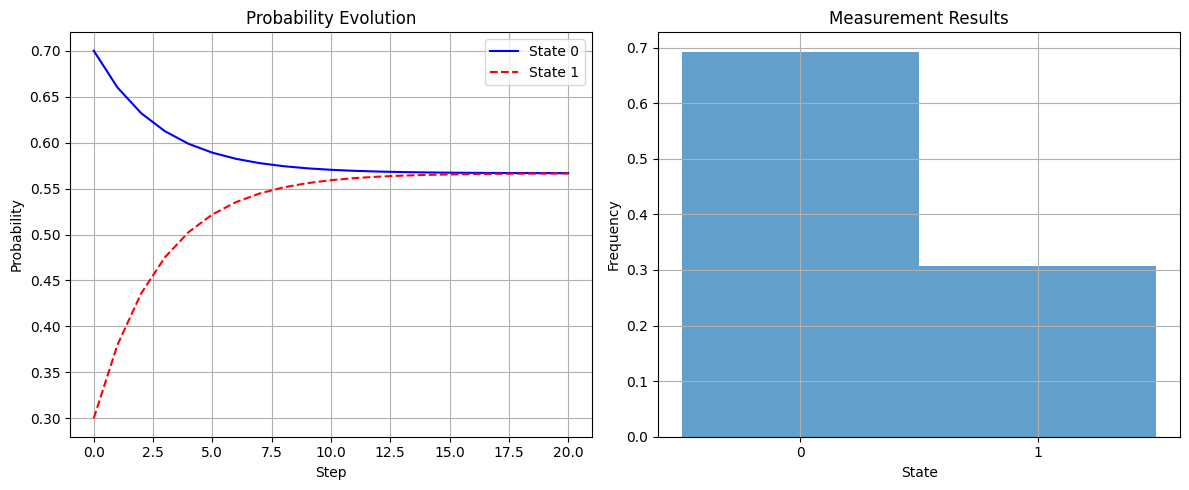

In [8]:
# Create and simulate a probabilistic system
initial_probs = np.array([0.7, 0.3])  # Initial probability distribution
transition_matrix = np.array([
    [0.9, 0.1],  # Probability of transitions from state 0
    [0.2, 0.8]   # Probability of transitions from state 1
])

system = ProbabilisticSystem(initial_probs, transition_matrix)

# Evolve the system
steps = 20
evolution = system.evolve(steps)

# Plot probability evolution
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(range(steps + 1), [state[0] for state in evolution], 'b-', label='State 0')
plt.plot(range(steps + 1), [state[1] for state in evolution], 'r--', label='State 1')
plt.xlabel('Step')
plt.ylabel('Probability')
plt.title('Probability Evolution')
plt.legend()
plt.grid(True)

# Perform measurements
measurements = system.measure(1000)
plt.subplot(122)
plt.hist(measurements, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Measurement Results')
plt.xticks([0, 1])
plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Quantum Systems

Quantum systems introduce the concept of complex probability amplitudes and quantum superposition. We'll implement a simple qubit system.

### Mathematical Background
In quantum mechanics:
- States are represented by complex vectors in a Hilbert space
- Evolution is governed by unitary operators: $|\psi(t)\rangle = U(t)|\psi(0)\rangle$
- Measurements collapse the quantum state according to Born's rule
- Probability of measuring state $|i\rangle$ is $|\langle i|\psi\rangle|^2$

In [9]:
class QuantumSystem:
    """A class representing a quantum system (qubit).
    
    This class implements quantum operations on a single qubit, including
    state preparation, unitary evolution, and measurement.
    """
    
    def __init__(self, initial_state: np.ndarray):
        """Initialize the quantum system.
        
        Args:
            initial_state (np.ndarray): Initial quantum state vector
            
        Raises:
            ValueError: If state vector is not normalized
        """
        # Normalize the state vector
        norm = np.sqrt(np.sum(np.abs(initial_state) ** 2))
        if not np.isclose(norm, 1.0):
            raise ValueError("Initial state must be normalized")
            
        self.state = initial_state
        
    def apply_gate(self, gate: np.ndarray) -> None:
        """Apply a quantum gate (unitary operator) to the state.
        
        Args:
            gate (np.ndarray): Unitary operator to apply
        """
        self.state = np.dot(gate, self.state)
        
    def get_probabilities(self) -> np.ndarray:
        """Calculate measurement probabilities.
        
        Returns:
            np.ndarray: Array of measurement probabilities
        """
        return np.abs(self.state) ** 2
    
    def measure(self, num_measurements: int) -> List[int]:
        """Perform measurements on the quantum state.
        
        Args:
            num_measurements (int): Number of measurements to perform
            
        Returns:
            List[int]: List of measurement outcomes (0 or 1)
        """
        probs = self.get_probabilities()
        return np.random.choice([0, 1], size=num_measurements, p=probs)
    
    @staticmethod
    def rotation_gate(theta: float) -> np.ndarray:
        """Create a rotation gate.
        
        Args:
            theta (float): Rotation angle
            
        Returns:
            np.ndarray: Rotation gate matrix
        """
        return np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta), np.cos(theta)]
        ])

In [ ]:
# Create and simulate a quantum system
initial_state = np.array([1, 0], dtype=complex) / np.sqrt(2)  # Initial quantum state
system = QuantumSystem(initial_state)

# Evolution parameters
steps = 50
theta = np.pi / 16  # Rotation angle per step
evolution = []

# Simulate quantum evolution
for _ in range(steps):
    evolution.append(system.state.copy())
    system.apply_gate(QuantumSystem.rotation_gate(theta))

evolution = np.array(evolution)

# Plot results
plt.figure(figsize=(12, 5))

# Plot state evolution
plt.subplot(121)
plt.plot(range(steps), np.real(evolution[:, 0]), 'b-', label='Re(ψ₀)')
plt.plot(range(steps), np.real(evolution[:, 1]), 'r--', label='Re(ψ₁)')
plt.plot(range(steps), np.imag(evolution[:, 0]), 'g-.', label='Im(ψ₀)')
plt.plot(range(steps), np.imag(evolution[:, 1]), 'm:', label='Im(ψ₁)')
plt.xlabel('Step')
plt.ylabel('Amplitude')
plt.title('Quantum State Evolution')
plt.legend()
plt.grid(True)

# Perform and plot measurements
measurements = system.measure(1000)
plt.subplot(122)
plt.hist(measurements, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7)
plt.xlabel('Measurement Outcome')
plt.ylabel('Probability')
plt.title('Quantum Measurements')
plt.xticks([0, 1])
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final state probabilities
probs = system.get_probabilities()
print(f"\nFinal measurement probabilities:")
print(f"State |0⟩: {probs[0]:.3f}")
print(f"State |1⟩: {probs[1]:.3f}")

# Print quantum state information
print(f"\nFinal quantum state:")
print(f"|ψ⟩ = {system.state[0]:.3f}|0⟩ + {system.state[1]:.3f}|1⟩")

ValueError: Initial state must be normalized

## Comparison and Analysis

We have implemented and demonstrated three different computational paradigms:

1. **Classical System**
   - Deterministic evolution
   - Continuous state space
   - Observable quantities have definite values
   - Energy is conserved

2. **Probabilistic System**
   - Stochastic evolution
   - Discrete state space
   - Observable quantities follow probability distributions
   - Approaches equilibrium distribution

3. **Quantum System**
   - Unitary evolution
   - Complex state space
   - Superposition and interference
   - Measurement causes state collapse

### Key Differences

1. **State Description**
   - Classical: Definite values (position, momentum)
   - Probabilistic: Probability distributions
   - Quantum: Complex probability amplitudes

2. **Evolution**
   - Classical: Deterministic differential equations
   - Probabilistic: Stochastic matrices
   - Quantum: Unitary operators

3. **Measurement**
   - Classical: Reveals actual state
   - Probabilistic: Random outcome based on probabilities
   - Quantum: Collapses superposition to eigenstate

This progression from classical to quantum systems represents a fundamental shift in our understanding of nature and computation.

# Modelling Classical, probabilistic, and Quantum Systems

## Classical Discrete Systems
![Deterministic System](images/ClassicPhysicalSystem.png)



Modeling the dynamic behaviors and the state of a classical discrete system using matrices and vectors. The state after one click is computed as follows:

$$ 
    \begin{bmatrix} 0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 1 && 0 && 0 && 0 && 1 \\
                   0 && 0 && 0 && 1 && 0 && 0 \\
                   0 && 0 && 1 && 0 && 0 && 0 \\
                   1 && 0 && 0 && 0 && 1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix} 6 \\
                    2 \\
                    1 \\
                    5 \\
                    3 \\
                    10 \\
    \end{bmatrix}
    =
    \begin{bmatrix} 0 \\
                    0 \\
                    12 \\
                    5 \\
                    1 \\
                    9 \\
    \end{bmatrix}$$

In [ ]:
import numpy as np

# Define the transition matrix and initial state vector
m1 = np.array([[0,0,0,0,0,0], 
               [0,0,0,0,0,0], 
               [0,1,0,0,0,1],
               [0,0,0,1,0,0], 
               [0,0,1,0,0,0], 
               [1,0,0,0,1,0]])

v1 = np.array([[6], [2], [1], [5], [3], [10]])

print("Initial state vector:")
print(v1.reshape(-1))
print("\nTransition matrix:")
print(m1)

# Calculate state after one click
state_after_one_click = np.dot(m1, v1)
print("\nState after one click:")
print(state_after_one_click.reshape(-1))

![State after two clicks.](images/ClassicPhysicalSystem2.png)

The state after two cliks is computed as follows:

In [ ]:
# Calculate state after two clicks
state_after_two_clicks = np.dot(m1, state_after_one_click)
print("State after two clicks:")
print(state_after_two_clicks.reshape(-1))

# Verify properties
print("\nVerification:")
print(f"Sum of elements in initial state: {np.sum(v1)}")
print(f"Sum of elements after one click: {np.sum(state_after_one_click)}")
print(f"Sum of elements after two clicks: {np.sum(state_after_two_clicks)}")

## Exercises 



### Excercise 1:

1. Write a program to model the behavior of the probabilistic double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/ProbabilisticSystem.png)

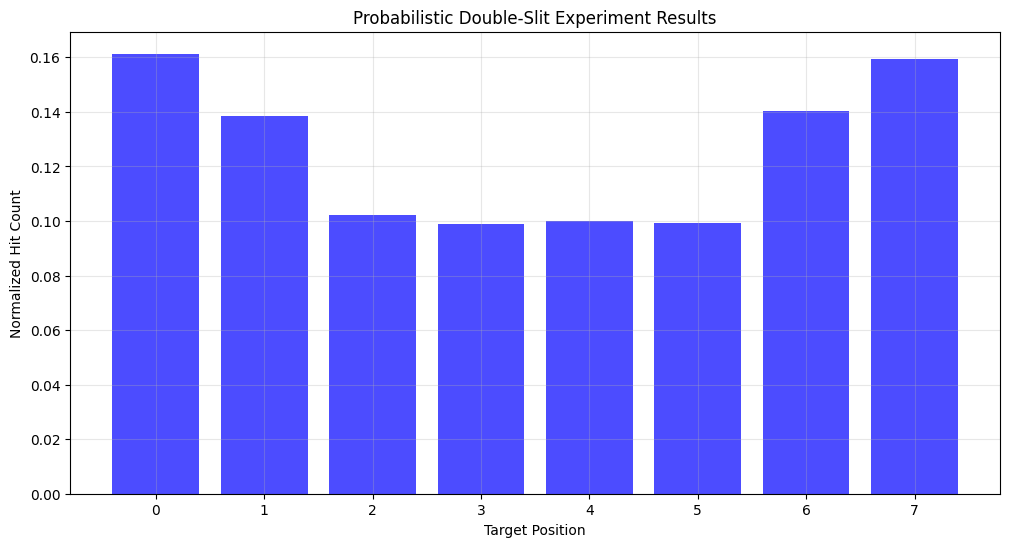


Normalized hit counts at each position:
Position 0: 0.1613
Position 1: 0.1384
Position 2: 0.1022
Position 3: 0.0989
Position 4: 0.1001
Position 5: 0.0994
Position 6: 0.1404
Position 7: 0.1593


In [18]:
import numpy as np
import matplotlib.pyplot as plt

class ProbabilisticDoubleSlit:
    def __init__(self, num_targets=8):
        """Initialize the probabilistic double-slit experiment.
        
        Args:
            num_targets (int): Number of target positions on the screen
        """
        self.num_targets = num_targets
        # Probability matrix: each row represents probabilities from a slit
        # to each target position
        self.prob_matrix = np.zeros((2, num_targets))
        
        # Initialize probabilities based on distance and spread
        # Slit 1 probabilities (favors left side)
        self.prob_matrix[0] = np.array([0.3, 0.25, 0.15, 0.1, 0.1, 0.05, 0.03, 0.02])
        # Slit 2 probabilities (favors right side)
        self.prob_matrix[1] = np.array([0.02, 0.03, 0.05, 0.1, 0.1, 0.15, 0.25, 0.3])
        
        # Normalize probabilities
        self.prob_matrix[0] /= np.sum(self.prob_matrix[0])
        self.prob_matrix[1] /= np.sum(self.prob_matrix[1])
    
    def run_experiment(self, num_particles=10000):
        """Run the double-slit experiment with classical particles.
        
        Args:
            num_particles (int): Number of particles to send through the slits
            
        Returns:
            numpy.ndarray: Array of hit counts at each target position
        """
        # Initialize hit counter for each target position
        hits = np.zeros(self.num_targets)
        
        for _ in range(num_particles):
            # Randomly choose which slit the particle goes through
            slit = np.random.randint(0, 2)
            # Choose target position based on slit probabilities
            target = np.random.choice(self.num_targets, p=self.prob_matrix[slit])
            hits[target] += 1
        
        return hits
    
    def plot_results(self, hits):
        """Plot the results of the experiment.
        
        Args:
            hits (numpy.ndarray): Array of hit counts at each target position
        """
        positions = np.arange(self.num_targets)
        plt.figure(figsize=(12, 6))
        plt.bar(positions, hits/np.sum(hits), color='blue', alpha=0.7)
        plt.title('Probabilistic Double-Slit Experiment Results')
        plt.xlabel('Target Position')
        plt.ylabel('Normalized Hit Count')
        plt.grid(True, alpha=0.3)
        plt.show()

# Run the experiment
experiment = ProbabilisticDoubleSlit()
results = experiment.run_experiment(num_particles=100000)
experiment.plot_results(results)

# Print numerical results
print("\nNormalized hit counts at each position:")
normalized_hits = results/np.sum(results)
for i, hits in enumerate(normalized_hits):
    print(f"Position {i}: {hits:.4f}")

### Excercise 2:

1. Write a program to model the behavior of the quantum double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/QuantumSystem.png)

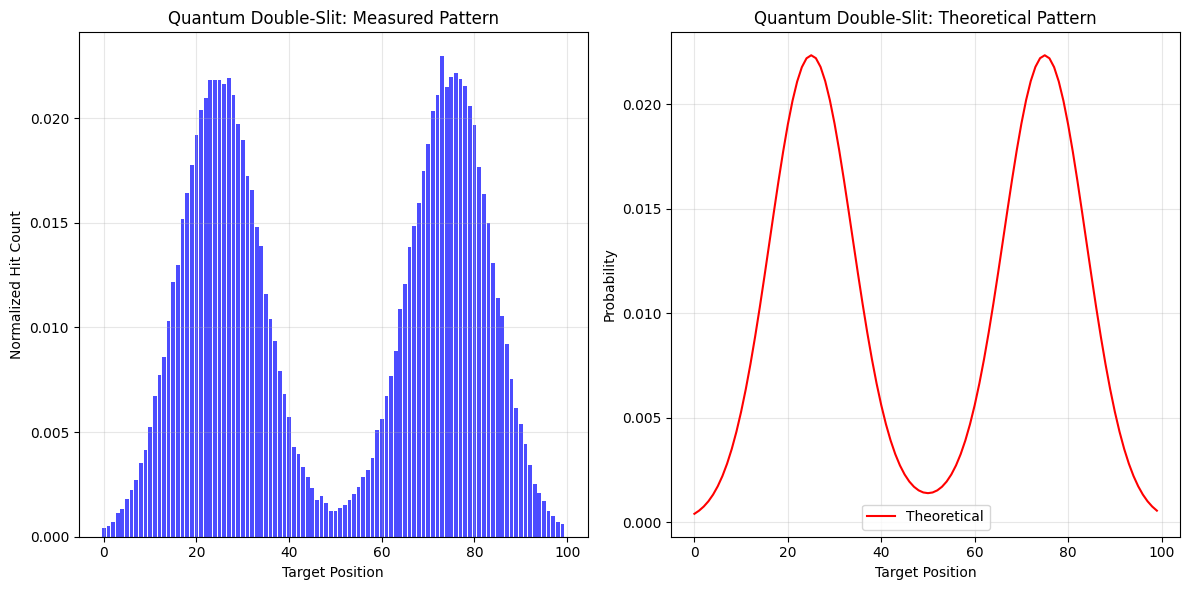


Theoretical probabilities at key positions:
Central maximum: 0.0223
Number of interference peaks: 46
Peak positions: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


In [15]:
class QuantumDoubleSlit:
    def __init__(self, num_targets=8):
        """Initialize the quantum double-slit experiment.
        
        Args:
            num_targets (int): Number of target positions on the screen
        """
        self.num_targets = num_targets
        # Define the quantum state transformation matrix
        # This includes interference effects between paths
        phase = np.pi / 4  # Phase difference between paths
        
        # Create superposition state when particle goes through both slits
        self.psi = np.zeros((num_targets,), dtype=complex)
        
        # Set up probability amplitudes with interference
        for i in range(num_targets):
            # Contribution from first slit
            amp1 = np.exp(-0.5 * ((i - num_targets/4)/(num_targets/8))**2)
            # Contribution from second slit
            amp2 = np.exp(-0.5 * ((i - 3*num_targets/4)/(num_targets/8))**2)
            # Combine with phase difference to create interference
            self.psi[i] = (amp1 + amp2 * np.exp(1j * phase)) / np.sqrt(2)
        
        # Normalize the state
        self.psi /= np.sqrt(np.sum(np.abs(self.psi)**2))
    
    def get_probabilities(self):
        """Calculate the probability distribution.
        
        Returns:
            numpy.ndarray: Array of probabilities for each target position
        """
        return np.abs(self.psi)**2
    
    def run_experiment(self, num_particles=10000):
        """Run the quantum double-slit experiment.
        
        Args:
            num_particles (int): Number of particles to send through the slits
            
        Returns:
            numpy.ndarray: Array of hit counts at each target position
        """
        probs = self.get_probabilities()
        hits = np.random.multinomial(num_particles, probs)
        return hits
    
    def plot_results(self, hits):
        """Plot the results of the experiment.
        
        Args:
            hits (numpy.ndarray): Array of hit counts at each target position
        """
        positions = np.arange(self.num_targets)
        plt.figure(figsize=(12, 6))
        
        # Plot histogram of hits
        plt.subplot(121)
        plt.bar(positions, hits/np.sum(hits), color='blue', alpha=0.7)
        plt.title('Quantum Double-Slit: Measured Pattern')
        plt.xlabel('Target Position')
        plt.ylabel('Normalized Hit Count')
        plt.grid(True, alpha=0.3)
        
        # Plot theoretical probability distribution
        plt.subplot(122)
        plt.plot(positions, self.get_probabilities(), 'r-', label='Theoretical')
        plt.title('Quantum Double-Slit: Theoretical Pattern')
        plt.xlabel('Target Position')
        plt.ylabel('Probability')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Run the quantum experiment
quantum_experiment = QuantumDoubleSlit(num_targets=100)
quantum_results = quantum_experiment.run_experiment(num_particles=100000)
quantum_experiment.plot_results(quantum_results)

# Print numerical results for key positions
probs = quantum_experiment.get_probabilities()
print("\nTheoretical probabilities at key positions:")
print(f"Central maximum: {np.max(probs):.4f}")
peaks = np.where(probs > np.mean(probs))[0]
print(f"Number of interference peaks: {len(peaks)}")
print(f"Peak positions: {peaks}")

## Exercise 3: Simulating the Double Slit Experiment with Waves

### Objective

In this exercise, you will create a simulation of the double slit experiment using Python. Unlike particle-based interpretations, you will model light as waves and observe the interference pattern that emerges when waves pass through two slits and overlap on a screen. This simulation will help you visualize how constructive and destructive interference patterns form.

### Background

The double slit experiment demonstrates the wave-particle duality of light and
matter. When coherent light passes through two closely spaced slits, it creates
an interference pattern of bright and dark fringes on a detection screen. This
pattern results from the constructive and destructive interference of the waves
emanating from the slits.

### References

[Mathematics of Interference](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/03%3A_Interference/3.03%3A_Mathematics_of_Interference)

### Task

Your task is to simulate the wave interference pattern using Python. Assume each slit acts as a point source of waves that spread out in circular patterns. When these waves overlap, they interfere with each other, creating a pattern of alternating high and low intensity on a screen.

### Steps

1. **Setup the Environment**: Ensure you have Python installed with the necessary libraries: NumPy for numerical calculations and Matplotlib for plotting.

2. **Define Parameters**:
   - Define the distance between the slits, the wavelength of the light, the distance from the slits to the screen, and the number of points on the screen where intensity will be calculated.

3. **Model the Waves**:
   - For simplicity, you can assume the wavefronts are straight lines perpendicular to the direction of propagation. Use the Huygens-Fresnel principle to model each slit as a source of new waves.

4. **Calculate Intensity**:
   - Use the principle of superposition to calculate the resultant wave amplitude at each point on the screen by summing the contributions from each slit.
   - The intensity of light at each point is proportional to the square of the amplitude of the resultant wave.

5. **Plot the Results**:
   - Plot the calculated intensity pattern on the screen. You should observe a series of bright and dark fringes, demonstrating the interference pattern.

### Hints

- Use NumPy arrays to efficiently calculate the wave amplitudes and intensities across the screen.
- Remember, the phase difference between the waves from the two slits contributes to the constructive (in-phase) and destructive (out-of-phase) interference.

### Sample Code Skeleton




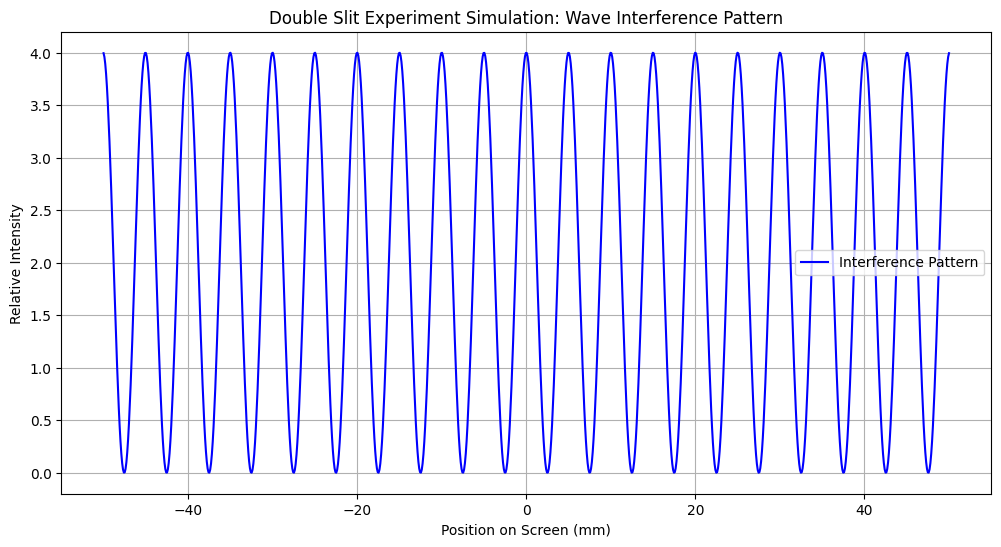


Key measurements:
Central maximum intensity: 4.00
First minimum occurs at approximately: ±5.00 mm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_intensity(x, slit_distance, wavelength, screen_distance):
    """Calculate the intensity at a point x on the screen.
    
    Args:
        x (float): Position on the screen
        slit_distance (float): Distance between slits
        wavelength (float): Wavelength of light
        screen_distance (float): Distance to screen
    
    Returns:
        float: Intensity at position x
    """
    # Path difference between waves from the two slits
    k = 2 * np.pi / wavelength  # wave number
    d = slit_distance / 2  # half the distance between slits
    
    # Calculate phase difference
    sin_theta = x / np.sqrt(x**2 + screen_distance**2)
    path_diff = 2 * d * sin_theta
    phase_diff = k * path_diff
    
    # Calculate intensity using cosine squared (interference term), normalized to max=1
    return (np.cos(phase_diff/2))**2  # Removed factor of 4 for normalization

# Define parameters
slit_distance = 0.1e-3    # 0.1 mm between slits
wavelength = 500e-9       # 500 nm (green light)
screen_distance = 1.0     # 1 meter to screen
screen_width = 0.1        # 10 cm screen width
num_points = 1000         # number of calculation points

# Create screen points array
screen_points = np.linspace(-screen_width/2, screen_width/2, num_points)

# Calculate intensity at each point
intensity = np.array([calculate_intensity(x, slit_distance, wavelength, screen_distance) 
                     for x in screen_points])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(screen_points * 1000, intensity, 'b-', label='Interference Pattern')
plt.xlabel('Position on Screen (mm)')
plt.ylabel('Relative Intensity (normalized)')
plt.title('Double Slit Interference Pattern (normalized)')
plt.grid(True)
plt.legend()
plt.show()

# Print key measurements
central_max = np.max(intensity)
print(f"\nKey measurements:")
print(f"Central maximum intensity: {central_max:.2f}")
# Corrected formula for first minimum (added factor of 1/2)
print(f"First minimum occurs at approximately: ±{wavelength * screen_distance / (2 * slit_distance) * 1000:.2f} mm")